# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger">

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

dataset = pd.read_csv('student_scores.csv')
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values
print(X)
print(y)
dataset.head(5)




[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [79]:
print("this is a simple linear regression problem.")

this is a simple linear regression problem.


In [80]:
print("the independent variable is hours \n"
      "the dependent variable is scores ")

the independent variable is hours 
the dependent variable is scores 


In [81]:
dataset.shape

(25, 2)

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [83]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


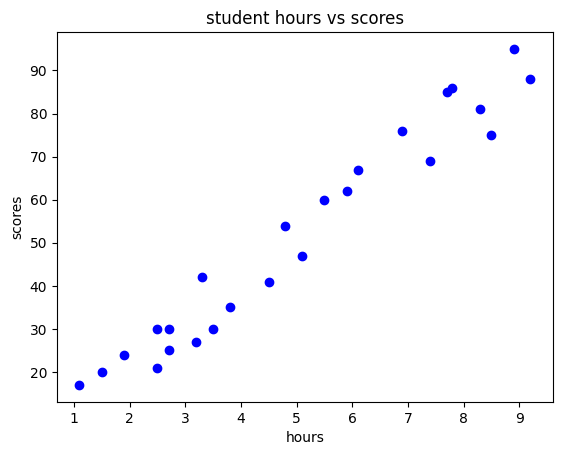

In [84]:
plt.scatter(X,y, color='blue')
plt.title('student hours vs scores')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()


### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn.
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [86]:
intercept = model.intercept_
slope = model.coef_[0]
print(f"model equation: y = {intercept:.2f} + {slope:.2f} * X")


model equation: y = -0.17 + 10.60 * X


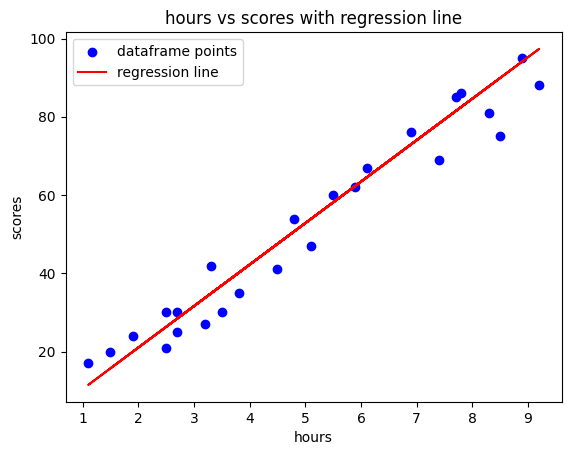

In [87]:
plt.scatter(X, y, color='blue', label='dataframe points')
plt.plot(X, model.predict(X), color='red', label='regression line')
plt.title('hours vs scores with regression line')
plt.xlabel('hours')
plt.ylabel('scores')
plt.legend()
plt.show()


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Training set metrics

mae_train = mean_absolute_error(y_train,y_train_pred)
mse_train = mean_squared_error(y_train,y_train_pred)
rmse_train = np.sqrt(mse_train)
r2e_train=model.score(x_train,y_train)

# Test set metrics

mae_test = mean_absolute_error(y_test,y_test_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test,y_test_pred)
r2e_test=model.score(x_test,y_test)

print("training set performance:")
print("MAE:", mae_train)
print("MSE:",mse_train)
print("RMSE:",rmse_train)
print("R2:",r2e_train)

print("\ntesting set performance:")
print("MAE:",mae_test)
print("MSE:",mse_test)
print("RMSE:",rmse_test)
print("R2:",r2e_test)

print("\n overfitting means the model does better in training than in the testing which is not the case here")


training set performance:
MAE: 4.133999151256549
MSE: 21.287759491684064
RMSE: 4.613866002788124
R2: 0.9577908563832255

testing set performance:
MAE: 8.763951656503048
MSE: 90.8172114192854
RMSE: 9.529806473338553
R2: -0.839894882886657

 overfitting means the model does better in training than in the testing which is not the case here


The R-squared (R²) metric, also known as the coefficient of determination, measures the proportion of the variance in the target variable that is explained by the model’s predictors. It provides insight into how well the model’s predictions align with the actual values. R² values range from 0 to 1, with values closer to 1 indicating that the model explains a higher proportion of the variance.

How R-squared is Calculated
R² is calculated as:

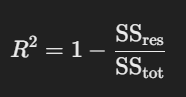

where:

SS_res (Residual Sum of Squares): the sum of the squared differences between actual and predicted values.
SS_tot (Total Sum of Squares): the sum of the squared differences between actual values and their mean.
Interpretation of R-squared
R² = 1: The model perfectly explains the variance in the data.
R² = 0: The model does not explain any of the variance (it’s equivalent to using the mean of the data as a prediction).
Negative R²: This indicates the model performs worse than a simple mean prediction (often seen when using inappropriate models).

In [89]:
print("""model demonstrates good performance, as evidenced by:

      -High R² values on both the training and testing sets.""")

model demonstrates good performance, as evidenced by:

      -High R² values on both the training and testing sets.


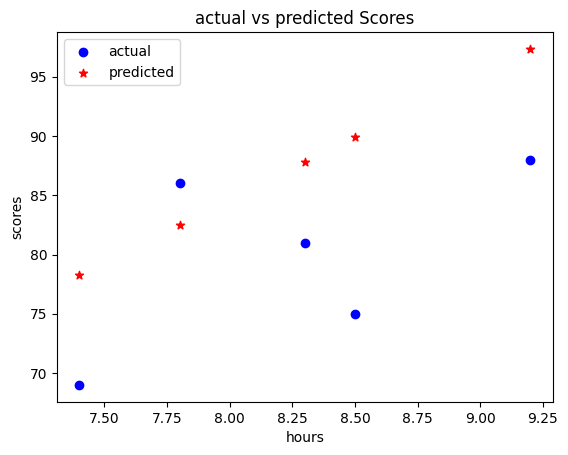

In [90]:
plt.scatter(x_test, y_test, color='blue',label='actual')
plt.scatter(x_test, y_test_pred,color='red',marker='*',label='predicted')
plt.title('actual vs predicted Scores')
plt.xlabel('hours')
plt.ylabel('scores')
plt.legend()
plt.show()



## Multiple linear regression

### Data description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics.

<div class="alert alert-block alert-danger">
    
1. Import the Boston Housing dataset.
2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.
3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.
4. Split the generated dataset.
5. Normalize the data (excluding the label) using the min max scaler strategy.


<div/>

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
df= pd.read_csv("HousingData.csv")
df.head(5)
# imputer = SimpleImputer(strategy='mean')
# data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

data = df.fillna(df.mean())

correlation Matrix:


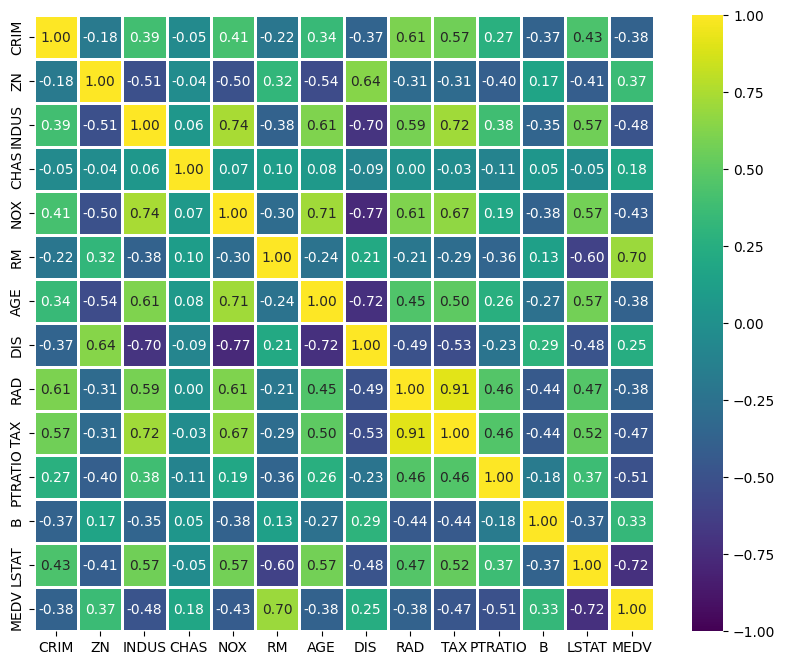

In [92]:
correlation_matrix = data.corr()
print("correlation Matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='viridis',fmt='.2f',linewidths=2,vmax=1,vmin=-1)
plt.show()



In [93]:
medv_corr = correlation_matrix['MEDV'].sort_values(ascending=False)
print("Correlation with MEDV:\n", medv_corr)

high_corr_features = medv_corr[abs(medv_corr) >= 0.6].index
print("\nHighly correlated features with MEDV:\n", high_corr_features)

Correlation with MEDV:
 MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64

Highly correlated features with MEDV:
 Index(['MEDV', 'RM', 'LSTAT'], dtype='object')


Index(['RM', 'LSTAT'], dtype='object')


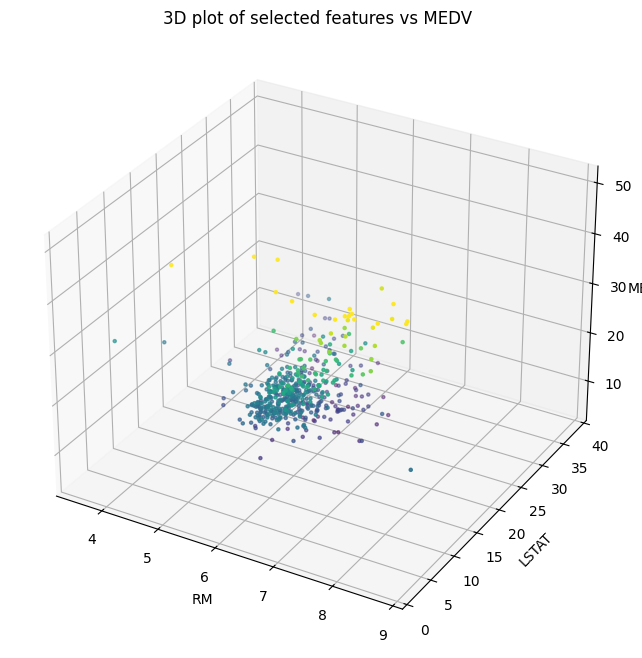

In [94]:
selected_features = high_corr_features.drop('MEDV')[:2]
print(selected_features)
col=data["MEDV"]

# Plot the 3D relationship between the selected features and MEDV
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[selected_features[0]], data[selected_features[1]], data['MEDV'],c=col,marker='.',cmap="viridis")
ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel('MEDV')
plt.title("3D plot of selected features vs MEDV")
plt.show()

In [95]:

X = data[selected_features]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [96]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=selected_features)

print("normalized x_train:\n",X_train_scaled.head())

normalized x_train:
          RM     LSTAT
0  0.293065  0.639625
1  0.400854  0.185982
2  0.440919  0.168322
3  0.455562  0.594923
4  0.379093  0.263521


In [97]:
print("test scaled \n",X_test_scaled.head())

test scaled 
          RM     LSTAT
0  0.519219  0.201711
1  0.588774  0.049669
2  0.431157  0.450883
3  0.447834  0.104581
4  0.495017  0.428808


### Data training and evaluation

<div class="alert alert-block alert-danger">
    
1. Use the following lines of code to perform training on the Boston Housing dataset.

<div/>

In [98]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

learning_rates = [0.01, 0.001, 0.0001]
r2_values = {}

for eta in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=eta,tol=None,verbose=0)
    sgdr.fit(X_train_scaled,y_train)
    r2_train = sgdr.score(X_train_scaled,y_train)
    r2_values[eta] = r2_train
    print(f"Learning rate {eta}: R² = {r2_train}")


Learning rate 0.01: R² = 0.637285572486083
Learning rate 0.001: R² = 0.5553104190483944
Learning rate 0.0001: R² = 0.11807180842159148


<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    

<div/>

.
.
.

When to Use Each:

Use fit() when you have a complete dataset and want to train the model in one go.

Use partial_fit() (savesmemory) for online learning or for large datasets that need to be processed in batches, where you want to incrementally update the model without resetting it.

.
.
.

c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\

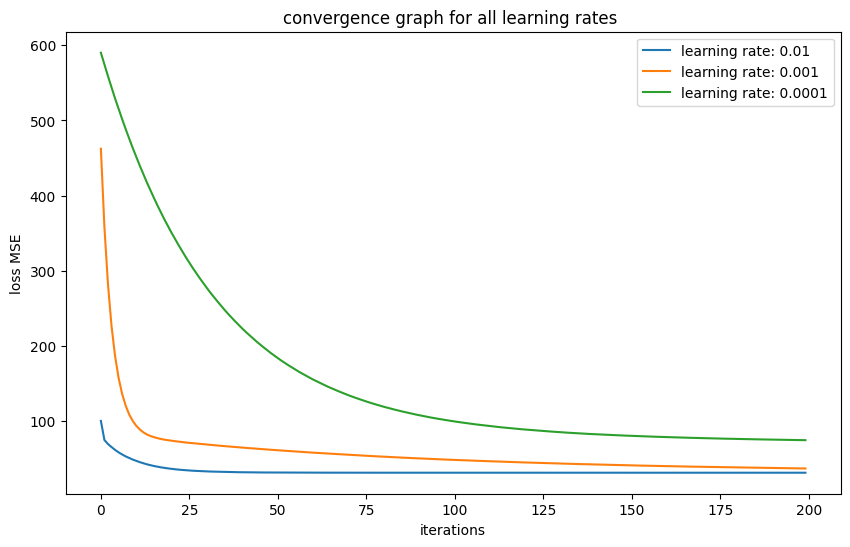


Convergence to a Plateau: At a higher learning rate, the model reaches a stable minimum faster.
The loss can quickly approach a point where further iterations do not yield significant changes



In [118]:

loss_curves={}
def train_and_record_loss(sgdr,X_train,y_train,max_iter=200):
    loss_curve = []
    for _ in range(max_iter):
        sgdr.fit(X_train, y_train)  
        y_train_pred = sgdr.predict(X_train)
        loss = mean_squared_error(y_train, y_train_pred)
        loss_curve.append(loss)
    return loss_curve


for eta in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=eta,max_iter=1,warm_start=True)
    loss_curve = train_and_record_loss(sgdr, X_train_scaled, y_train)
    loss_curves[eta] = loss_curve

plt.figure(figsize=(10, 6))
for eta in learning_rates[:]:  
    plt.plot(loss_curves[eta], label=f"learning rate: {eta}")
plt.xlabel("iterations")
plt.ylabel("loss MSE")
plt.title("convergence graph for all learning rates ")
plt.legend()
plt.show()

# Explanation of Observations
print("""
Convergence to a Plateau: At a higher learning rate, the model reaches a stable minimum faster.
The loss can quickly approach a point where further iterations do not yield significant changes
""")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store performance metrics for each model
performance_metrics = {}

# Evaluate each model on the test set
for eta in learning_rates:
    # Train the model again with each learning rate
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=eta, tol=1e-3)
    sgdr.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = sgdr.predict(X_test_scaled)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store metrics in the dictionary
    performance_metrics[eta] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

# Display the results for each learning rate
for eta, metrics in performance_metrics.items():
    print(f"Performance for Learning Rate {eta}:")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.4f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {metrics['RMSE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print("-" * 40)

# Determine the best model based on RMSE (or another metric if preferred)
best_eta = min(performance_metrics, key=lambda x: performance_metrics[x]['RMSE'])
print(f"The best model based on RMSE is with learning rate {best_eta}")


Performance for Learning Rate 0.01:
  Mean Absolute Error (MAE): 3.8699
  Mean Squared Error (MSE): 30.9321
  Root Mean Squared Error (RMSE): 5.5617
  R-squared: 0.5782
----------------------------------------
Performance for Learning Rate 0.001:
  Mean Absolute Error (MAE): 4.0178
  Mean Squared Error (MSE): 34.7860
  Root Mean Squared Error (RMSE): 5.8980
  R-squared: 0.5256
----------------------------------------
Performance for Learning Rate 0.0001:
  Mean Absolute Error (MAE): 5.6161
  Mean Squared Error (MSE): 65.9116
  Root Mean Squared Error (RMSE): 8.1186
  R-squared: 0.1012
----------------------------------------
The best model based on RMSE is with learning rate 0.01


c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


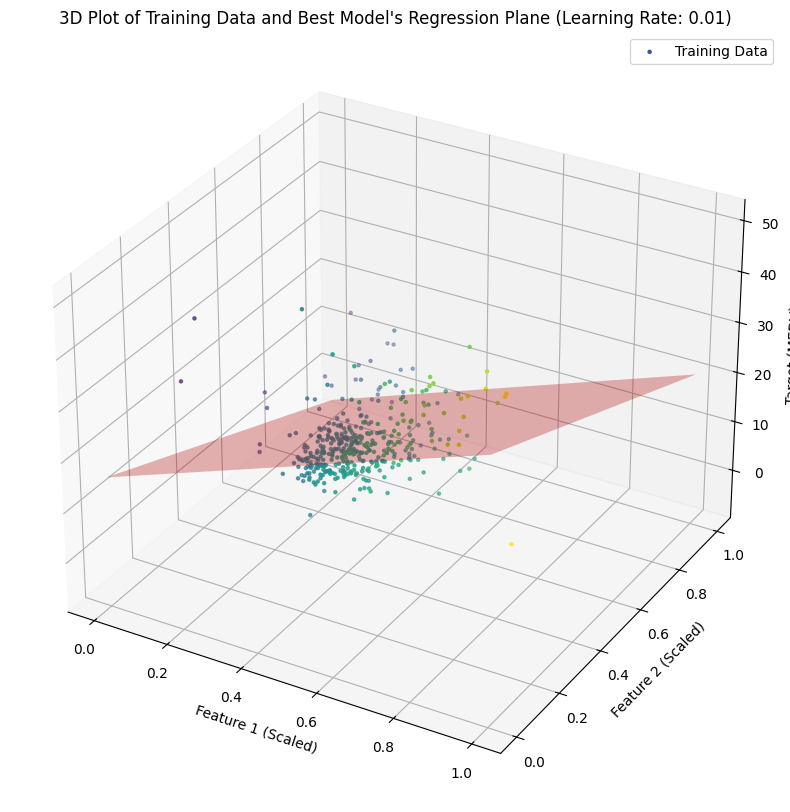


Observation:
The plot shows the best model's regression plane in red, fitted to the scaled training data points (in blue).
- The regression plane attempts to pass through or close to the data points, capturing the general trend of the data.
- Any significant deviation of points from the plane indicates that the model might not capture all underlying patterns in the data, suggesting either a non-linear relationship or potential need for additional features or transformations.



In [115]:

X_train_scaled_np = X_train_scaled.values if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled


best_model = SGDRegressor(learning_rate='invscaling', eta0=best_eta, max_iter=1000, tol=1e-3)
best_model.fit(X_train_scaled_np[:, :2], y_train)  


x1_range = np.linspace(X_train_scaled_np[:, 0].min(), X_train_scaled_np[:, 0].max(), 50)
x2_range = np.linspace(X_train_scaled_np[:, 1].min(), X_train_scaled_np[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
predicted_y = best_model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
predicted_y = predicted_y.reshape(x1_grid.shape)


fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_scaled_np[:, 0], X_train_scaled_np[:, 1], y_train,c=X_train_scaled_np[:, 0], marker='.',cmap="viridis", label="Training Data")
ax.plot_surface(x1_grid, x2_grid, predicted_y, color='red', alpha=0.3, rstride=100, cstride=100)


ax.set_xlabel("Feature 1 (Scaled)")
ax.set_ylabel("Feature 2 (Scaled)")
ax.set_zlabel("Target (MEDV)")
ax.set_title(f"3D Plot of Training Data and Best Model's Regression Plane (Learning Rate: {best_eta})")
ax.legend()
plt.show()

print("""
Observation:
The plot shows the best model's regression plane in red, fitted to the scaled training data points (in blue).
- The regression plane attempts to pass through or close to the data points, capturing the general trend of the data.
- Any significant deviation of points from the plane indicates that the model might not capture all underlying patterns in the data, suggesting either a non-linear relationship or potential need for additional features or transformations.
""")


In [102]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
sample_data = np.array([[1.13081, 0.0, 8.14, 0.0, 0.538, 5.713, 94.1, 4.233, 4.0, 307.0, 21.0, 360.17, 22.6]])

sample_data_df = pd.DataFrame(sample_data, columns=column_names)

sample_data_two_features = sample_data_df[['RM', 'LSTAT']]  

sample_data_scaled = scaler.transform(sample_data_two_features)

predicted_value = best_model.predict(sample_data_scaled)

print(f"The predicted target (price) for the given sample is: {predicted_value[0]:.2f}")


The predicted target (price) for the given sample is: 13.41
